# Bathymetry for Barkley Canyon

Uses General Bathymetric Chart of the Ocean (GEBCO) NetCDF data to create an approximate bathymetry plot for Barkley Canyon. This plot is NOT scaled to WGS84 coordinate system, but is approximately accurate.

## Imports

In [195]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cmocean
%matplotlib notebook

In [233]:
ds = xr.open_dataset('./gebco.nc')     # import general regional data
print(ds)

<xarray.Dataset>
Dimensions:    (lat: 71, lon: 90)
Coordinates:
  * lat        (lat) float64 48.18 48.18 48.19 48.19 ... 48.46 48.46 48.46 48.47
  * lon        (lon) float64 -126.2 -126.2 -126.2 ... -125.9 -125.8 -125.8
Data variables:
    elevation  (lat, lon) int16 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2020 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2020 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/a29c5465-b138-234d-e053-6c86abc040b9
    comment:      The data in the GEBCO_2020 Grid should not be used for navi...
    node_offset:  1.0


## Define region

In [488]:
lon = np.array(ds.lon.values[5:])                   # set desired region using lat and lon
lat = np.array(ds.lat.values[10:63])
elev = np.array(ds.elevation.values[10:63,5:])

slope_lat = 48.427                                  # set specific coordinates for ADCP
slope_lon = -126.174
axis_lat = 48.317
axis_lon = -126.050
line_y = np.array([slope_lat-0.004,axis_lat+0.002]) # set coordinates for distance line
line_x = np.array([slope_lon+0.004,axis_lon-0.003])

<IPython.core.display.Javascript object>


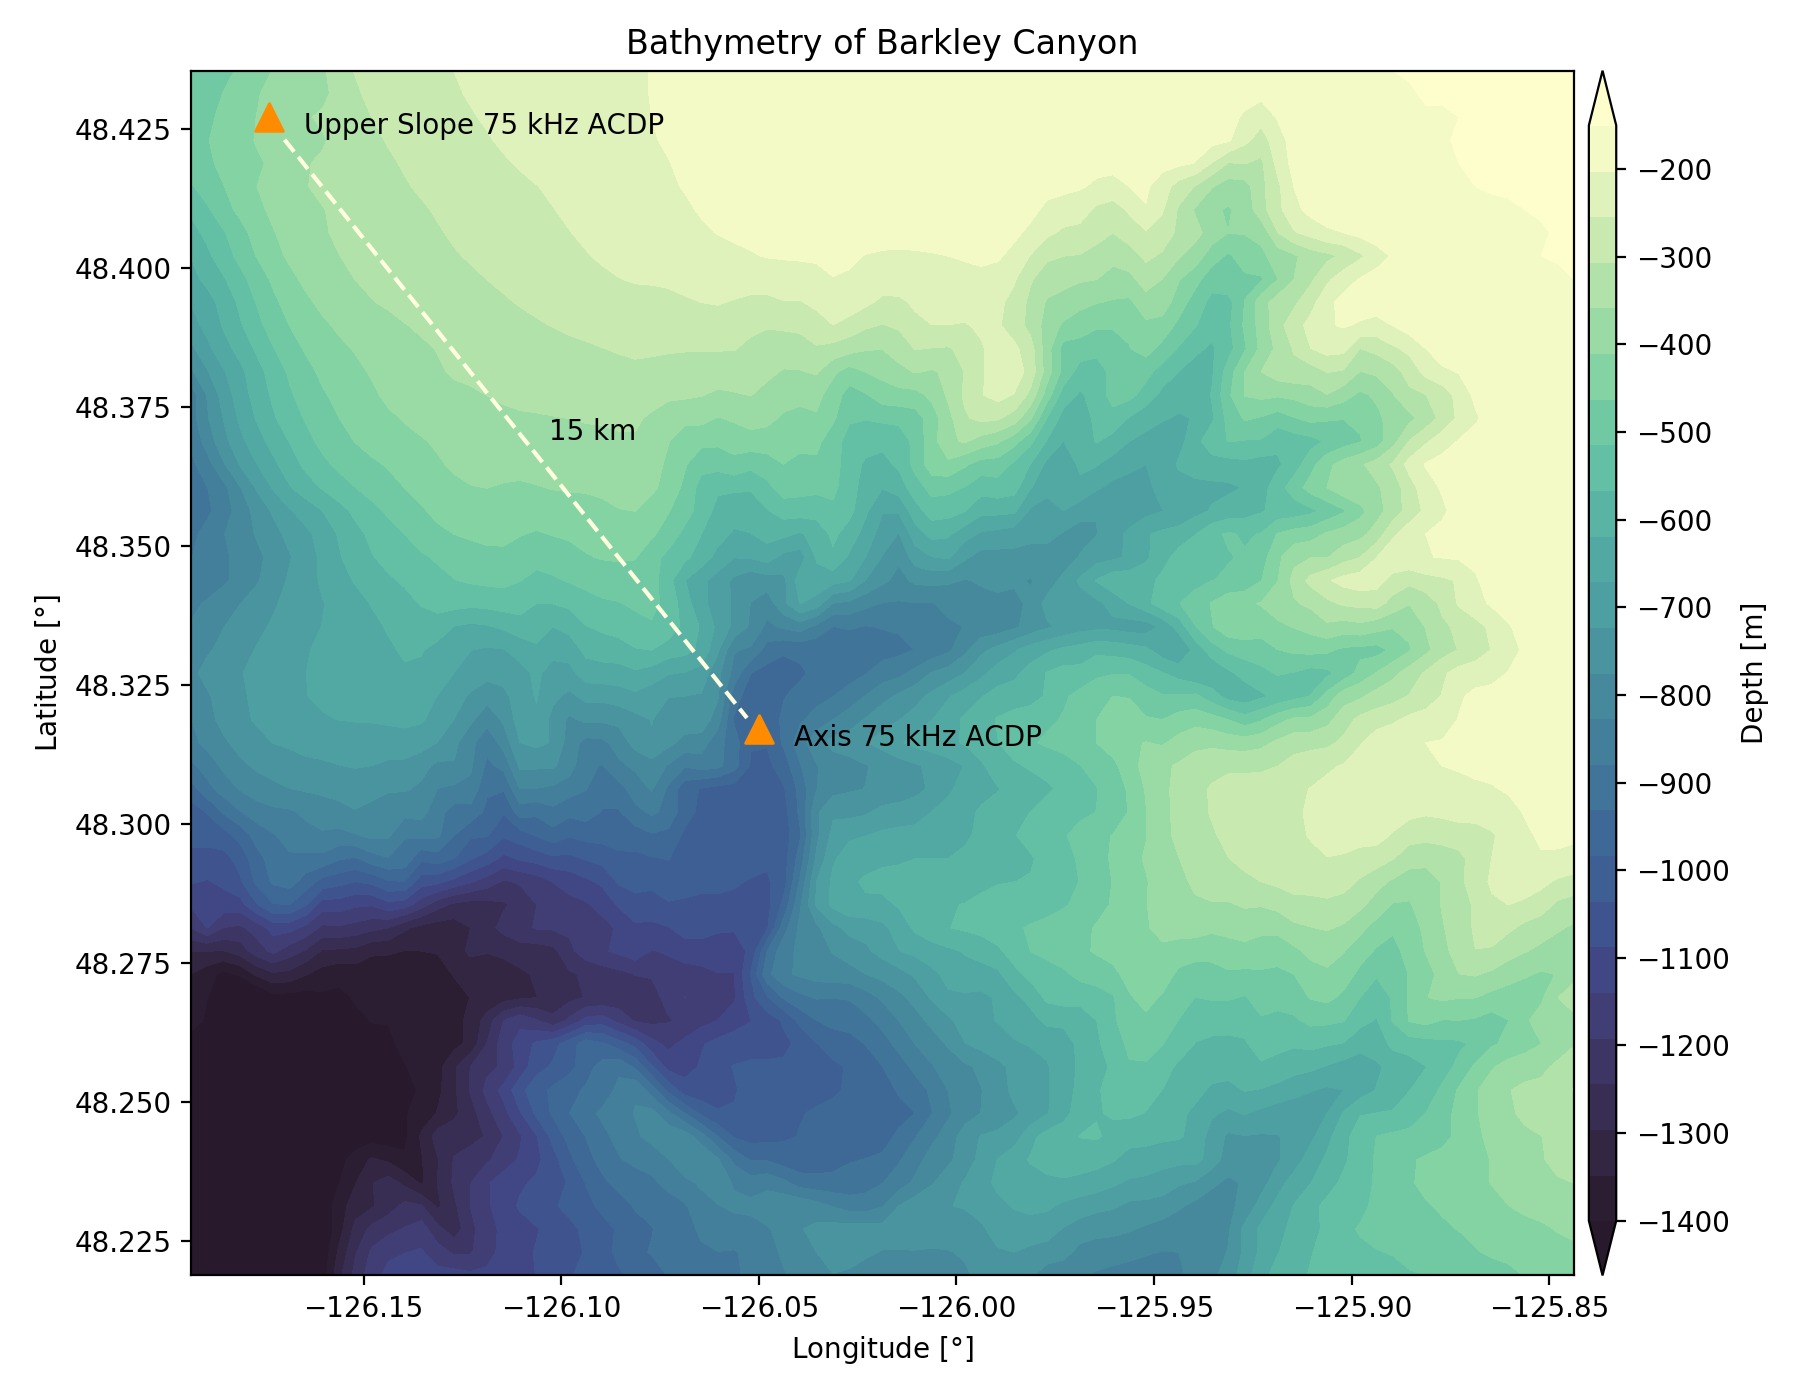

In [571]:
# plot bathymetry

fig, ax = plt.subplots(1,1,figsize=(9,7))

levels = 25       # set contour parameters for visual clarity and adjust colorbar
vmin = -1400
vmax = -150
ticks = np.arange(vmin,vmax+1,100)
level_boundaries = np.linspace(vmin,vmax,levels)

im = ax.contourf(lon,lat,elev,levels=level_boundaries,vmin=vmin,vmax=vmax,extend='both',cmap='cmo.deep_r')
cbar = fig.colorbar(im,fraction=0.05,aspect=40,pad=0.01,ticks=ticks,label='Depth [m]')
ax.set_xlabel('Longitude [$\degree$]')
ax.set_ylabel('Latitude [$\degree$]')
ax.set_title('Bathymetry of Barkley Canyon')

ax.plot(line_x,line_y,color='lightyellow',ls='--')
ax.scatter(slope_lon,slope_lat,color='darkorange',s=100,marker='^')
ax.text(-126.165,48.424,'Upper Slope 75 kHz ACDP',fontsize=10)
ax.scatter(axis_lon,axis_lat,color='darkorange',s=100,marker='^')
ax.text(-126.041,48.314,'Axis 75 kHz ACDP',fontsize=10)
ax.text(-126.103,48.369,'15 km',fontsize=10)

fig.tight_layout()
plt.show()

plt.savefig(fname='./bathymetry.pdf',format='pdf')